In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("arbres.csv",sep=";")

In [3]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [4]:
df[['circonference_cm','hauteur_m']].describe()

,circonference_cm,hauteur_m
count,200137.000000,200137.000000
mean,83.380479,13.110509
std,673.190213,1971.217387
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,250255.000000,881818.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [6]:
#df.loc[df['hauteur_m'] >= 200000 ]

df = df.drop(df[df['hauteur_m'] >= 70].index) #record du plus grand arbre france = 66 mètres : Douglas Président :reset index

In [7]:
#df.loc[df['circonference_cm'] >= 10000 ]

df = df.drop(df[df['circonference_cm'] >= 1323].index) #record sequoia dans la creuse 13m23

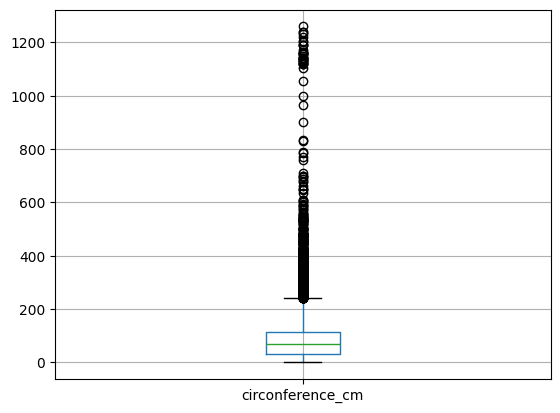

In [8]:
boxplt = df.boxplot(column = ['circonference_cm']) 
boxplt.plot()
plt.show()

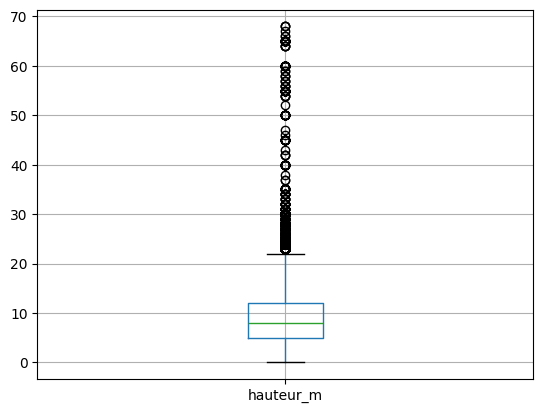

In [9]:
boxplt = df.boxplot(column = ['hauteur_m']) 
boxplt.plot()
plt.show()

libelle_francais
Platane                 42424
Marronnier              25180
Tilleul                 21239
Erable                  18369
Sophora                 11784
Frêne                    5170
Pin                      4842
Micocoulier              4060
Chêne                    3865
Cerisier à fleurs        3766
Charme                   3470
Poirier à fleurs         3408
Noisetier de Byzance     3369
Peuplier                 3307
Robinier                 2304
Bouleau                  2249
Orme                     2066
If                       1994
Hêtre                    1925
Paulownia                1409
Name: count, dtype: int64


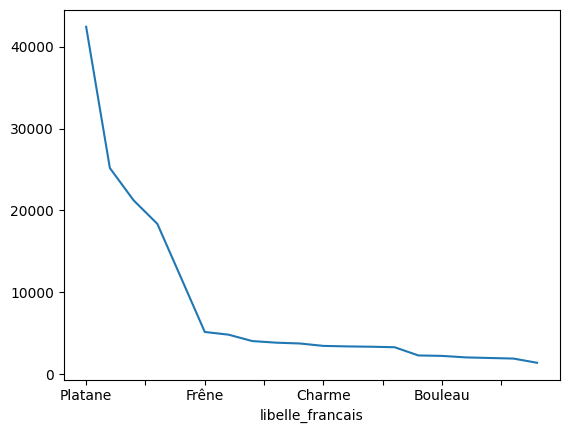

In [10]:
print(df.libelle_francais.value_counts()[:20])
df.libelle_francais.value_counts()[:20].plot()
plt.show()

In [11]:
df.groupby(['arrondissement']).remarquable.value_counts()

arrondissement     remarquable
BOIS DE BOULOGNE   0.0             3913
BOIS DE VINCENNES  0.0            10671
HAUTS-DE-SEINE     0.0              667
PARIS 10E ARRDT    0.0             2876
                   1.0                1
PARIS 11E ARRDT    0.0             4634
                   1.0                1
PARIS 12E ARRDT    0.0             8510
                   1.0               26
PARIS 13E ARRDT    0.0            10817
                   1.0                4
PARIS 14E ARRDT    0.0             9941
                   1.0               10
PARIS 15E ARRDT    0.0             9418
                   1.0                7
PARIS 16E ARRDT    0.0            10612
                   1.0               53
PARIS 17E ARRDT    0.0             7623
                   1.0                8
PARIS 18E ARRDT    0.0             6761
                   1.0               10
PARIS 19E ARRDT    0.0             8683
                   1.0               10
PARIS 1ER ARRDT    0.0             1223
         

In [12]:
test = df.groupby(['arrondissement']).remarquable.value_counts()

In [13]:
test.iloc[3]

2876